# Introduction to Neural Network (NN)

# PyTorch Basis  
## Low Level PyTorch

In [1]:
import numpy as np
import torch
torch.__version__

'2.0.1+cu118'

In [2]:
x = np.arange(20).reshape(5, 4) # Generate an array
print(f"X: \n{x}") # print('X:', x)
print(f"Shape: {x.shape}")
print(f"Add 5:\n{x + 5}")
print(f"X*X^T: \n{np.dot(x,(x.T))}")
# or
print(f"X*X^T: \n{x @ x.T}")
print(f"mean over raw: \n {x.mean(axis=1)}")
print(f"mean over column: \n {x.mean(axis=0)}")
print(f"cumsum of cols: \n {x.cumsum(axis=0)}")

X: 
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]
Shape: (5, 4)
Add 5:
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]
 [21 22 23 24]]
X*X^T: 
[[  14   38   62   86  110]
 [  38  126  214  302  390]
 [  62  214  366  518  670]
 [  86  302  518  734  950]
 [ 110  390  670  950 1230]]
X*X^T: 
[[  14   38   62   86  110]
 [  38  126  214  302  390]
 [  62  214  366  518  670]
 [  86  302  518  734  950]
 [ 110  390  670  950 1230]]
mean over raw: 
 [ 1.5  5.5  9.5 13.5 17.5]
mean over column: 
 [ 8.  9. 10. 11.]
cumsum of cols: 
 [[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]
 [40 45 50 55]]


In [ ]:
type(x)

numpy.ndarray

**PyTorch world**

<span style="color:blue">In pyTorch we have</span> `torch.tensor` <span style="color:blue">instead of </span> `numpy.array`

In [3]:
#x = np.arange(20).reshape(5, 4)
#x = torch.tensor(x, dtype=torch.float32)
x = (torch.arange(20, dtype=torch.float32)).reshape(5, 4)

print(f"X: \n {x}")
print(f"shape of X: {x.shape}")
print(f"Add 5: \n {x + 5}")
print(f"X*X^T: \n {x @ x.T}")
print(f"mean over raw: \n {x.mean(axis=1)}")
print(f"mean over column: \n {x.mean(axis=0)}")
print(f"cumsum of cols: \n {x.cumsum(axis=0)}")

X: 
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])
shape of X: torch.Size([5, 4])
Add 5: 
 tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.],
        [21., 22., 23., 24.]])
X*X^T: 
 tensor([[  14.,   38.,   62.,   86.,  110.],
        [  38.,  126.,  214.,  302.,  390.],
        [  62.,  214.,  366.,  518.,  670.],
        [  86.,  302.,  518.,  734.,  950.],
        [ 110.,  390.,  670.,  950., 1230.]])
mean over raw: 
 tensor([ 1.5000,  5.5000,  9.5000, 13.5000, 17.5000])
mean over column: 
 tensor([ 8.,  9., 10., 11.])
cumsum of cols: 
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])


In [ ]:
# alternative way of defining tesnor

#x = torch.arange(20).reshape(5,4)
#x.mean()

In [ ]:
x = torch.tensor([1, 3])
x /= 2 # x = x /2  x = x + 2 ==> x +=2
x

RuntimeError: result type Float can't be cast to the desired output type Long

 error refers to type:  
 <span style="color:red">mean(): input dtype should be either floating point or complex dtypes. Got Long instead.</span>  
We need to clarify the tensor type.   
In NumPy it is executed atumotically.

`print(f"mean over raw: \n {x.mean(axis=1)}")`  
the output is:  
`mean over raw:`  
` [ 1.5  5.5  9.5 13.5 17.5]`   

In [4]:
x.to(float).mean() # or torch.float32

tensor(9.5000, dtype=torch.float64)

In [5]:
x = torch.tensor([1, 3]).to(float)
x /= 2
x

tensor([0.5000, 1.5000], dtype=torch.float64)

In [6]:
# tensor to array

x = torch.ones(size=[5, 3])
x.numpy()

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

There are some simple mathematical functions with cool plots. For one, consider this:

## $$ x(t) = t - 1.5 * cos( 15 t) $$
## $$ y(t) = t - 1.5 * sin( 16 t) $$

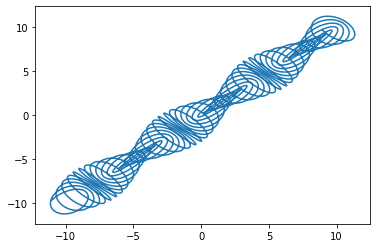

In [ ]:
import matplotlib.pyplot as plt

t = torch.linspace(-10, 10, 10000)

# SOLUTION
x = t - 1.5 * torch.cos(15 * t)
y = t - 1.5 * torch.sin(16 * t)

plt.plot(x.numpy(), y.numpy()) # or: plt.plot(x.detach(), y.detach())
plt.show()

## Automatic gradients

Any self-respecting DL framework must do your backprop for you. Torch handles this with the `autograd` module.

The general pipeline looks like this:
* When creating a tensor, you mark it as `requires_grad`:
    * __```torch.zeros(5, requires_grad=True)```__   
   
By `requires_grad=True` you are asking torch to track the mathematical operation with this tesnor and build the calculation graph.
Later on you backpropagate through this graph.

Loss function is evaluated by Gradient Descend. So DERIVATIVE is the main operation. torch calulates the derivative in a point (features or pixels which are tensor) with a specific $\theta$ tensor with `require_grad=True`
    


In [ ]:
x = torch.tensor(0., requires_grad=True)
y = torch.sin(x)

'''

The following two steps are a calculation of the derivative and then the value of it at a specific point.
it is used when we want to evaluate the "GD". First, the loss function derivative must be calculated (loss.backward()), then, its value in
given weight (W) has to be seen (w.grad)
'''

y.backward() #calculated the derivative of y
x.grad #gives the value of y derivative "y.backward()" at x .
#It means Gradients are available at x.grad. This is why we put "requires_grad=True")

tensor(1.)

In [ ]:
# in pytorch we could have skipped the gradient part unlike the previous.

def MSEloss(y, yhat): # y, yhat should be torch.tensor
    # SOLUTION
    # raise NotImplementedError()
    return ((y - yhat)**2).mean()

In [ ]:
y = torch.normal(0., 1., size=(100,))  # our target value
yhat = torch.normal(0., 1., size=(100,), requires_grad=True)  # our predicted values.
#derivative is evaluated with respect to the parameter in which we have "requires_grad=True".

loss = MSEloss(y, yhat)
loss.backward()
'''
analytic derivative:

d/dyhat(loss) = -2(y - yhat)/100

# The gradient values of "loss" at "yhat" are available in "yhat.grad".
#It should be equals to analytic derivative with values of y and yhat.
'''

print('Let\'s see if autograd result equals to analytical derivative.')
print(f'Checking ...\n {torch.allclose(yhat.grad, 2 * (yhat - y)/y.shape[0])}')

Let's see if autograd result equals to analytical derivative.
Checking ...
 True


calling `backward()` multiple times leads us sum of gradients available in `x`.

In [ ]:
x = torch.tensor(0, dtype=torch.float32, requires_grad=True)
y1 = torch.sin(x)
y2 = torch.sin(x)

print(f'x.grad = {x.grad}')
y1.backward()
print(f'x.grad = {x.grad}')
y2.backward()
print(f'x.grad = {x.grad}')

x.grad = None
x.grad = 1.0
x.grad = 2.0


to avoid this in a loop, we have to set the accumulate gradient to zero between consequtive `backward`, using `zero()`. Here's an example:

## REVIEW
**Stochastic Gradient Descent**

The <font color='blue'> main problem with Batch Gradient Descent </font> is the fact that <font color='blue'> it uses the whole
training set to compute the gradients at every step</font>,
which makes it very slow when the training set is large. At the opposite extreme, <font color='blue'> Stochastic Gradient Descent  </font> just picks <font color='blue'> a random instance in the training set at every step and computes the gradients
based only on that single instance</font>.

$$\frac{\partial}{\partial \theta_{j}} \operatorname{MSE}^{(i)}(\theta)=2 \left(\boldsymbol{\theta}^{T} \mathbf{x}^{(i)}-y^{(i)}\right) x_{j}^{(i)}$$

$$\nabla_{\boldsymbol{\theta}} \operatorname{MSE}^{(i)}(\boldsymbol{\theta})=\left(\begin{array}{c}
\frac{\partial}{\partial \theta_{0}} \operatorname{MSE}^{(i)}(\boldsymbol{\theta}) \\
\frac{\partial}{\partial \theta_{1}} \operatorname{MSE}^{(i)}(\boldsymbol{\theta}) \\
\vdots \\
\frac{\partial}{\partial \theta_{n}} \operatorname{MSE}^{(i)}(\boldsymbol{\theta})
\end{array}\right)=2 \left(\boldsymbol{\theta}^{T} \mathbf{x}^{(i)}-y^{(i)}\right) \mathbf{x}^{(i)}$$

- Obviously <font color='blue'> this makes the algorithm much faster </font> since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algorithm)

- On the other hand, <font color='blue'> due to its stochastic (i.e., random) nature</font>, this algorithm is <font color='blue'> much less regular than Batch Gradient Descent</font>: instead of gently decreasing until it reaches
the minimum, <font color='blue'> the cost function will bounce up and down, decreasing only on average</font>.
Over time it will end up very close to the minimum, but once it gets there it will
continue to bounce around, never settling down. <font color='blue'> So once the algorithm stops, the final parameter values are good, but not optimal</font>.

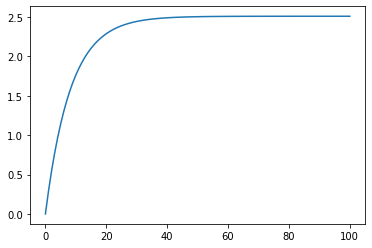

In [ ]:
# Generate linear data:

x = torch.tensor(np.random.uniform(-3, 5, 100), dtype=torch.float32)
y = 2.5 * x + torch.normal(0, std=0.4, size=x.shape)

# Purpose: Findinig w = 2.5

w = torch.tensor(0., dtype=torch.float32, requires_grad=True)

w_value_history = [
    w.item()
]

for _ in range(100): #number of iteration
    loss = MSEloss(y, w * x)
    loss.backward()
    with torch.no_grad(): # basically means whatever is below, is not attached to the calculation graph. temporarily sets all of the "requires_grad" to false.
        w -=0.01 * w.grad  # w is decreasing with some learning rate $\eta = 0.01$ . (Gradient Descend) The initial value of $\theta (w) = 0$
    w.grad.zero_() # to avoid accumulate sum of gradients.
    w_value_history.append(w.item())

plt.plot(w_value_history)
plt.show()

Calling `backward` for a vactor or tesnor which is not scalar

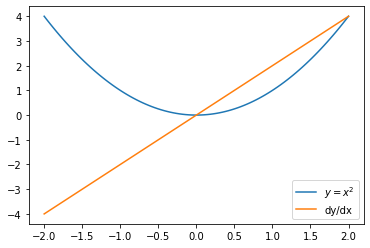

In [ ]:
x = torch.linspace(-2, 2, 100, requires_grad=True)
y = x ** 2

'''
Note: since `x` and `y` are both vectors, the derivative is
defined in the form of Jacobian dy/dx. So, torch needs to a vector which is multiplied by Jacobian matrix. (see chain rule in notebook)

For such cases `backward()` is implemented to calculate
the Jacobian multiplied by some other vector that you
have to provide as an argument e.g. `y.backward(some_vector)` -
this will return Jacobian dy/dx times `some_vector`.
'''

y.backward(torch.ones(100)) # or y.backward(torch.ones_like(x)) . torch.ones(100) is the vactor multiplied by Jacobian matrix

plt.plot(x.detach(), y.detach(), label='$y=x^2$') # using numpy() instead of detach() causes an error, since it is attached
# to computation graph (requires_grad=true). by detach(), it no longer attaches to the graph.
plt.plot(x.detach(), x.grad, label='dy/dx')
plt.legend()
plt.show()

In [ ]:
torch.ones_like(x)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

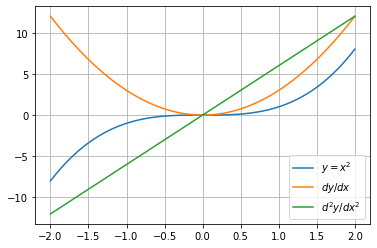

In [ ]:
x = torch.linspace(-2, 2, 100, requires_grad=True)
y = x ** 3

'''
module:
torch.autograd.grad( first arg: "the derivative of vactor (y)", second arg:" what vactor you want to calculate derivative with respect to (x)",
third arg: "vector that is multiplied by jacobian", fourth arg:careat_graph "True: the output of this operation is attached to calculation graph such that we can
calculate the derivative with respect to that" )

backward() is used for only derivative one time
'''

first_derivative, = torch.autograd.grad(
    y, x, torch.ones_like(x),
    create_graph=True
)

second_derivative, = torch.autograd.grad(first_derivative, x, torch.ones_like(first_derivative))

plt.plot(x.detach(), y.detach(), label='$y=x^2$')
plt.plot(x.detach(), first_derivative.detach(), label='$dy/dx$')
plt.plot(x.detach(), second_derivative.detach(), label='$d^2y/dx^2$')
plt.legend()
plt.grid()
plt.show()

## High-Level PyTorch

In [ ]:
from torchvision.datasets import MNIST
from IPython.display import clear_output

path = './MNIST'

ds_train = MNIST(path, train=True, download=True)
ds_test = MNIST(path, train=False, download=True)


In [ ]:
X_train, y_train = ds_train.data.reshape(-1, 784).to(torch.float32) , ds_train.targets
# what (-1) does is the notation for unknown dimension (60000), meaning:
#let numpy or pytorch fill the missing dimension with the correct value so my array remain with the same number of items.
#e.g.; for array = (100, 100): all reshape(10, 1000) and reshape (10, -1) and reshape(-1, 1000) and (-1, 10) are the same.
X_test, y_test = ds_test.data.reshape(-1, 784).to(torch.float32), ds_test.targets

<span style="color:red">As the pixel values range from 0 to 256, apart from 0 the range is 255.
So dividing all the values by 255 will convert it to range from 0 to 1.</span>    
Therefore, it will be faster and more efficient for our neural network computations.

In [ ]:
X_train, y_train = ds_train.data.reshape(-1, 784).to(torch.float32) / 255, ds_train.targets
X_test, y_test = ds_test.data.reshape(-1, 784).to(torch.float32) / 255, ds_test.targets
clear_output()

In [ ]:
print(f'Train size = {len(X_train)}, Test size = {len(X_test)}')

Train size = 60000, Test size = 10000


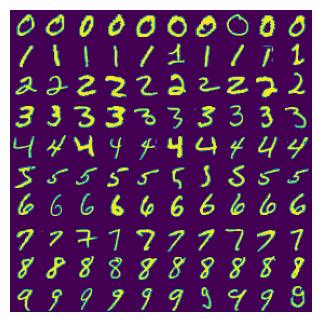

In [ ]:
plt.figure(figsize=(4, 4), dpi=100)
plt.axis('off')
plt.imshow(
    torch.transpose(
        torch.cat(
            [X_train[y_train == c][:10] for c in range(10)], axis=0
        ).reshape(10, 10, 28, 28),
        1, 2
    ).reshape(280, 280)
);

In [ ]:
from torch import nn # a modules related to several useful abstraction like "loss, layers, ..."
import torch.nn.functional as F # some functions that are used for calculations

### GPU support

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'Warning: using cpu')
print(device)

#device = torch.device('cpu')

cuda


In [ ]:
model = nn.Sequential( # composed of operations follows one up to another. Takes some input and do some operarations and gives the desire output.
        nn.Linear(784, 100),  # add first "dense" layer with 784 input
                             # units and 100 output (100 is somehow hyperparameter) units (hidden layer
                             # with 100 neurons). (Dens 1 + Activation 1 = Hidden Layer)
        nn.ReLU(), # activation function
        nn.Linear(100, 10), # 100 is input of Desn 2 and 10 is our desired output. (number of targets or classes)
# we could have added another activation layer here, e.g., nn.Softmax(). But if you predict probability (softmax or logistic reg. ), here and then
    # calculate all CrossEntropy (loss func.), it causes numerically unstability. In other words, if you use nn.softmax() as Activation function in last layer and
    # then use CrossEntropyLoss() as the loss function, actually you are employing Softmax() twise. Since, "CrossEntropyLoss() = LogSoftmax() + NLLLoss()".
).to(device)

In [ ]:
model

Sequential(
  (0): Linear(in_features=784, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
for w in model.parameters():
    print(f'wheight shapes: \n {w.shape}')

wheight shapes: 
 torch.Size([100, 784])
wheight shapes: 
 torch.Size([100])
wheight shapes: 
 torch.Size([10, 100])
wheight shapes: 
 torch.Size([10])



## wheight shapes:   
 torch.Size([100, 784])   
 torch.Size([100]) <span style="color:blue"> Number of bias term. </span> ReLU($W*X + b$). Since in linear models we always had bias term added to the $w * x$. If we do not have it in our model, the zero of input translated to the zero of output, for example.   
   
<span style="color:red">The first two are refer to the Dense 1 layer </span>  

wheight shapes:   
 torch.Size([10, 100])
 torch.Size([10])

"The second two are refer to the Dense 2 layer. "



In [ ]:
prediction = model(X_train.to(device))
print(f'The size of prediction: {prediction.shape}')

The size of prediction: torch.Size([60000, 10])


In [ ]:
loss_fn = nn.CrossEntropyLoss()
loss_fn(prediction, y_train.to(device))

tensor(2.3023, device='cuda:0', grad_fn=<NllLossBackward0>)

In [ ]:
# one moere step: Optimization . Desired model parameters can be optimized through various optimizers, e.g., MomentumSGD,
# RMSProp, Adam.
opt = torch.optim.Adam(model.parameters(), lr=1e-2)

then, inside the training loop you:
 1. calculate the gradients (`loss.backward()`)
 1. use the optimizer to update the model parameters (`opt.step()`). This optimizer can access derivatives. Calling `opt.steps()`updates parameters of your model, using those
 derivatives calculated at previous step.
 1. zero the gradients (`opt.zero_grad()`). By this, you zero the gradient for the next optimization.

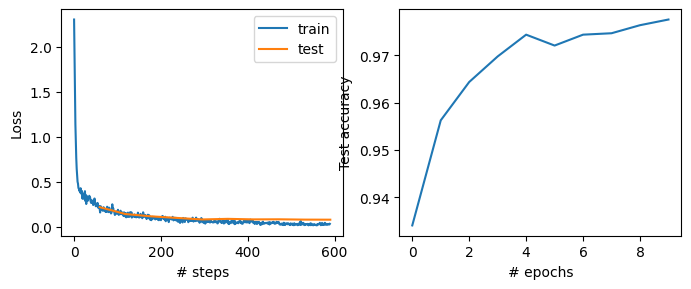

Duration: 0:00:37.620255
Maximum Accuracy: 
 0.9776


In [ ]:
# mini-batch Gardient descent
from datetime import datetime
from tqdm import trange

start_time = datetime.now()


num_epoch = 10
batch_size = 1024

# for plotting
train_losses = []
test_losses = []
test_accuracy = []

for i_epoch in range(num_epoch):
    shuffle_ids = np.random.permutation(len(X_train))
    for idx in trange(0, len(X_train), batch_size): # mini-bach Gradient Descent
        # get the next batch of data
        batch_X = X_train[shuffle_ids][idx : idx + batch_size].to(device)
        batch_y = y_train[shuffle_ids][idx : idx + batch_size].to(device)

        loss = loss_fn(model(batch_X), batch_y)
        loss.backward()
        opt.step()
        opt.zero_grad()

        #remember loss value at this step
        train_losses.append(loss.item())

    test_prediction = model(X_test.to(device))
    fin_loss = loss_fn(test_prediction, y_test.to(device))
    test_losses.append(fin_loss.item())
    # Alternatively we can write:
    #test_losses.append(
    #   loss_fn(test_prediction, y_test.to(device)).item())

    test_accuracy.append(
            (test_prediction.argmax(axis=1) == y_test.to(device)).to(float).mean().to('cpu')
    )
    # all the rest is simply plotting

    clear_output(wait=True)
    plt.figure(figsize=(8, 3), dpi=100)
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='train')
    plt.plot(
        np.linspace(0, len(train_losses), len(test_losses) + 1)[1:],
        test_losses, label='test'
    )
    plt.ylabel("Loss")
    plt.xlabel("# steps")
    plt.legend();

    plt.subplot(1, 2, 2)
    plt.plot(test_accuracy)
    plt.ylabel("Test accuracy")
    plt.xlabel("# epochs");
    plt.show()
end_time = datetime.now()
print(f'Duration: {(end_time - start_time)}') # print('Duration: {}'.format(end_time - start_time))
print(f'Maximum Accuracy: \n {max(test_accuracy)}')

In [ ]:
# what does permutation do ?

x1 = np.random.permutation(101)
x1

array([ 80,  36,  33,  17,  15,  34,  68,  79,  55,  40,  86,  87,  97,
        89,  16,  72,  30,  95,  28,   0,  83,   1,  12,  18,   4,  54,
        38,  19,  71,  84,  47,  88,  46,   8,  29,  63,   9,  53,  77,
        13,  93,  37,  32,  51,  31,  66,  21,  75,  20,  76,  59,  90,
        49,  14,  35,  60,  65,  26,  27,  69,  74,  22,  81,   6,   7,
        94,  57,  10,  45,  78,  96,   2,  64,  52,  11,  39,  41,  50,
        48,  42,  73,  62,  24,  67,  92,  56,  25, 100,  43,  85,   5,
        58,   3,  70,  82,  99,  44,  23,  91,  98,  61])

In [ ]:
# Let's take a look at : X_train[shuffle_ids][idx : idx + batch_size]

x1 = torch.tensor(np.random.randint(10, size=(3, 5)))
print(f'x1 dimension is: \n {x1.dim()}')
print(f'x1 size is: \n {x1.size()}')

x1 dimension is: 
 2
x1 size is: 
 torch.Size([3, 5])


In [ ]:
# our main problem contains [6000, 28, 28]
x1

tensor([[3, 4, 3, 8, 3],
        [0, 2, 7, 1, 2],
        [3, 7, 0, 6, 6]])

In [ ]:
# choosing between 60000 instance, randomly, starts from ith, ends in jth . One by One

x1[[2, 1, 1]][0 : 3], x1[0][0 : 2]  # x1[raws (60000)][Start(i) : End(j)] :-> means each step is 1 :: -> means each step is 2

(tensor([[3, 7, 0, 6, 6],
         [0, 2, 7, 1, 2],
         [0, 2, 7, 1, 2]]),
 tensor([3, 4]))

## XOR problem

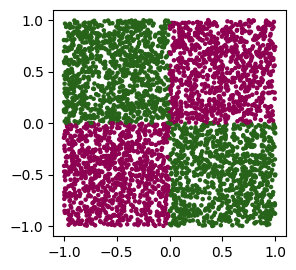

In [ ]:
X = np.random.uniform(-1, 1, size=(4000, 2))
y = ((X[:,0] >= 0) ^ (X[:,1] >= 0)).astype(int)

plt.figure(figsize=(3, 3), dpi=100)
plt.scatter(*X.T, c=y, cmap='PiYG', s=5);

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 484.25it/s]


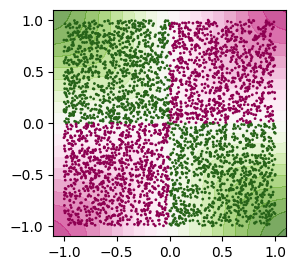

In [ ]:
# write a neural network model

# SOLUTION
model = nn.Sequential(
        nn.Linear(2, 1000),
        nn.ReLU(),
        nn.Linear(1000, 1),
).to(device)


# Optimizer and loss function
opt = torch.optim.Adam(model.parameters(), lr=1e-2)
loss_fn = nn.BCEWithLogitsLoss()
#loss_fn = nn.CrossEntropyLoss()


# traning loop
batch_size = 512
num_epoch = 10

for i_epoch in range(num_epoch):
    shuffle_ids = np.random.permutation(len(X))
    for idx in trange(0, len(X), batch_size):

        batch_X = torch.tensor(X[shuffle_ids][idx : idx + batch_size], dtype=torch.float32).to(device)
        batch_y = torch.tensor(y[shuffle_ids][idx : idx + batch_size], dtype=torch.float32).unsqueeze(1).to(device)
        # the balck magics
        loss = loss_fn(model(batch_X), batch_y)
        loss.backward()
        opt.step()
        opt.zero_grad()


# just for plotting

xx1, xx2 = np.meshgrid(
    np.linspace(-1.1, 1.1, 100),
    np.linspace(-1.1, 1.1, 100),
)
yy = model(torch.tensor(
    np.stack([xx1.ravel(), xx2.ravel()], axis=1),
    dtype=torch.float32
).to(device)).cpu().detach().numpy().reshape(xx1.shape)

plt.figure(figsize=(3, 3), dpi=100)
plt.contourf(xx1, xx2, yy, levels=20, cmap='PiYG', alpha=0.7)
plt.scatter(*X.T, c=y, cmap='PiYG', s=1);

In [ ]:
assert isinstance(model, nn.Module)

np.random.seed(42)
X = np.random.uniform(-1, 1, size=(4000, 2))
y = ((X[:,0] >= 0) ^ (X[:,1] >= 0)).astype(int)

prediction = model(
    torch.tensor(X, dtype=torch.float32).to(device)
).cpu().detach().numpy().squeeze()
accuracy = ((prediction > 0.).astype(int) == y).mean()
print("Accuracy:", accuracy)
assert accuracy > 0.95

Accuracy: 0.9945
